In [2]:
import math
import pymysql
from pandas.io import sql
import pandas as pd
import seaborn as sns
sns.set(font='Ricty Diminished',font_scale=2)
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", 101)
connection = pymysql.connect(host='db', db='kanpari', user='root', password='password',charset="utf8",cursorclass=pymysql.cursors.DictCursor)

In [3]:
terms = ['fish', 'howto', 'area', 'fish_offshore', 'howto_offshore', 'area_offshore', 'fish_fresh', 'area_fresh', 'area_bass', 'howto_bass']

In [84]:
def year_case(start_year, last_year, date):
    year_case = '(CASE '
    for year  in range(start_year, last_year):
        for month in range(1, 13):
            if month != 12: 
                year_case = year_case + "WHEN " + date + " >= '" + str(year) + "-" + str(month) + "-01' AND " + date + " < '" + str(year) + "-" + str(month + 1) + "-01' THEN '" + str(year) + "-" + str(month).zfill(2) + "' "            
            else:
                year_case = year_case + "WHEN " + date + " >= '" + str(year) + "-" + str(month) + "-01' AND " + date + " < '" + str(year + 1) + "-" + str(1) + "-01' THEN '" + str(year) + "-" + str(month).zfill(2) + "' "            
    year_case = year_case + "ELSE 'other' END) month"
    return year_case
year_str = year_case(2015, 2018, 'po.post_date')

In [103]:
# wtt.term_taxonomy_id, wtt.taxonomy, wt.name, wtt.count
sql_str = '''
SELECT
    wt.term_id,
    wt.name,
    wtt.term_taxonomy_id,
    wtt.taxonomy,
    wtt.parent
FROM `wp_terms` AS wt
    INNER JOIN `wp_term_taxonomy` AS wtt
    ON  wt.term_id = wtt.term_id
'''
df = sql.read_sql(sql_str, connection)
terms_comp = pd.merge(df, df, left_on='parent', right_on='term_id', suffixes=('', '_2'), how='left')
terms_comp = pd.merge(terms_comp, df, left_on='parent_2', right_on='term_id', suffixes=('', '_3'), how='left')
terms_comp = pd.merge(terms_comp, df, left_on='parent_3', right_on='term_id', suffixes=('', '_4'), how='left')
terms_comp = terms_comp.drop("parent", axis=1)
terms_comp = terms_comp.drop("term_taxonomy_id_2", axis=1)
terms_comp = terms_comp.drop("taxonomy_2", axis=1)
terms_comp = terms_comp.drop("parent_2", axis=1)
terms_comp = terms_comp.drop("term_taxonomy_id_3", axis=1)
terms_comp = terms_comp.drop("taxonomy_3", axis=1)
terms_comp = terms_comp.drop("parent_3", axis=1)
terms_comp = terms_comp.drop("term_taxonomy_id_4", axis=1)
terms_comp = terms_comp.drop("taxonomy_4", axis=1)
terms_comp = terms_comp.drop("parent_4", axis=1)
terms_comp
terms_lank = pd.DataFrame([], columns=['lank'])
for index, row in terms_comp.iterrows():
    if not math.isnan(row['term_id_4']):
        series = pd.Series([3], index=terms_lank.columns)
    elif not math.isnan(row['term_id_3']):
        series = pd.Series([2], index=terms_lank.columns)
    elif not math.isnan(row['term_id_2']):
        series = pd.Series([1], index=terms_lank.columns)
    else:
        series = pd.Series([0], index=terms_lank.columns)
    terms_lank = terms_lank.append(series, ignore_index = True)
terms_comp = pd.concat([terms_comp, terms_lank], axis=1)

In [115]:
# wtt.term_taxonomy_id, wtt.taxonomy, wt.name, wtt.count
month_str = year_case(2012, 2018, 'po.post_date')
sql_str = '''
SELECT
    po.ID,
    {month_str},
    wtr.term_taxonomy_id,
    pf.kpf_point
FROM `wp_posts` AS po
LEFT JOIN `wp_usces_postform` pf
ON po.ID = pf.post_id
LEFT JOIN `wp_term_relationships` wtr
ON wtr.object_id = po.ID
WHERE po.post_status = 'publish'
AND po.post_type = 'fishingpost'
'''.format(month_str=month_str)
posts = sql.read_sql(sql_str, connection)
posts_dropna = posts.dropna(how='any')
posts_dropna_comp = pd.merge(posts_dropna, terms_comp, on='term_taxonomy_id')
posts_dropna_comp

,ID,month,term_taxonomy_id,kpf_point,term_id,name,taxonomy,term_id_2,name_2,term_id_3,name_3,term_id_4,name_4,lank
0,245583,2016-01,663.0,100.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
1,245639,2016-01,663.0,110.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
2,270240,2016-01,663.0,220.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
3,245654,2016-01,663.0,120.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
4,245669,2016-01,663.0,100.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
5,245711,2016-01,663.0,130.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
6,245765,2016-01,663.0,110.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
7,245786,2016-01,663.0,120.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
8,245795,2016-01,663.0,110.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0
9,245804,2016-01,663.0,110.0,96,メバリング,howto,17.0,釣り方（ルアー釣り）,NaN,NaN,NaN,NaN,1.0


In [126]:
posts_dropnas_groupby = posts_dropna_comp.groupby(['taxonomy'])
fishposts = posts_dropnas_groupby.get_group(('howto'))

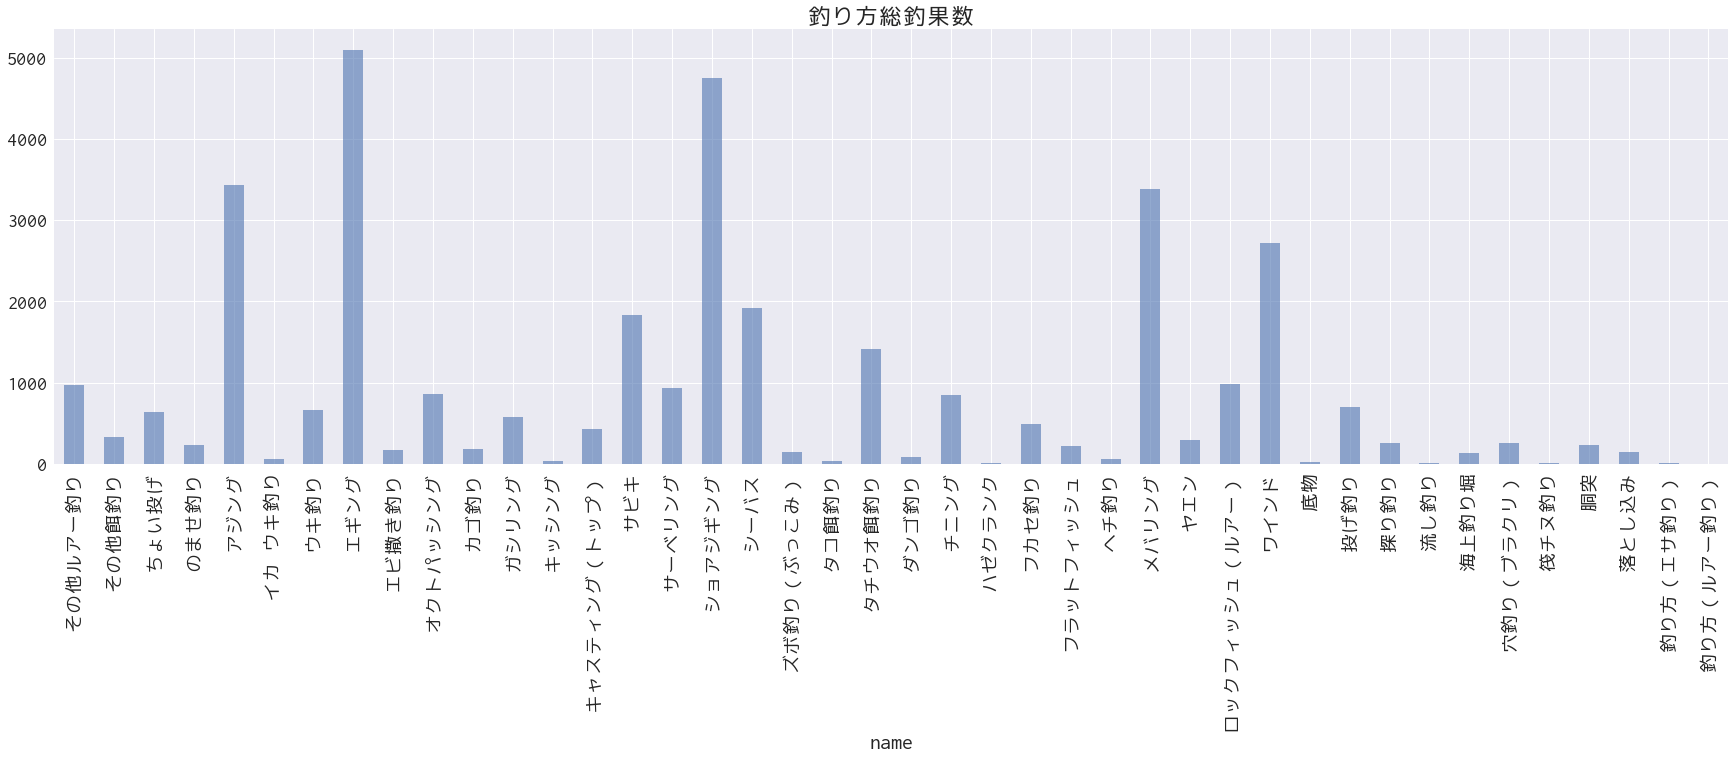

In [127]:
fishsposts_groupby = fishposts.groupby(['name'])
fishposts_count = fishsposts_groupby.size()
fishposts_count.plot.bar(title='釣り方総釣果数', figsize=(30, 8), alpha=0.6)

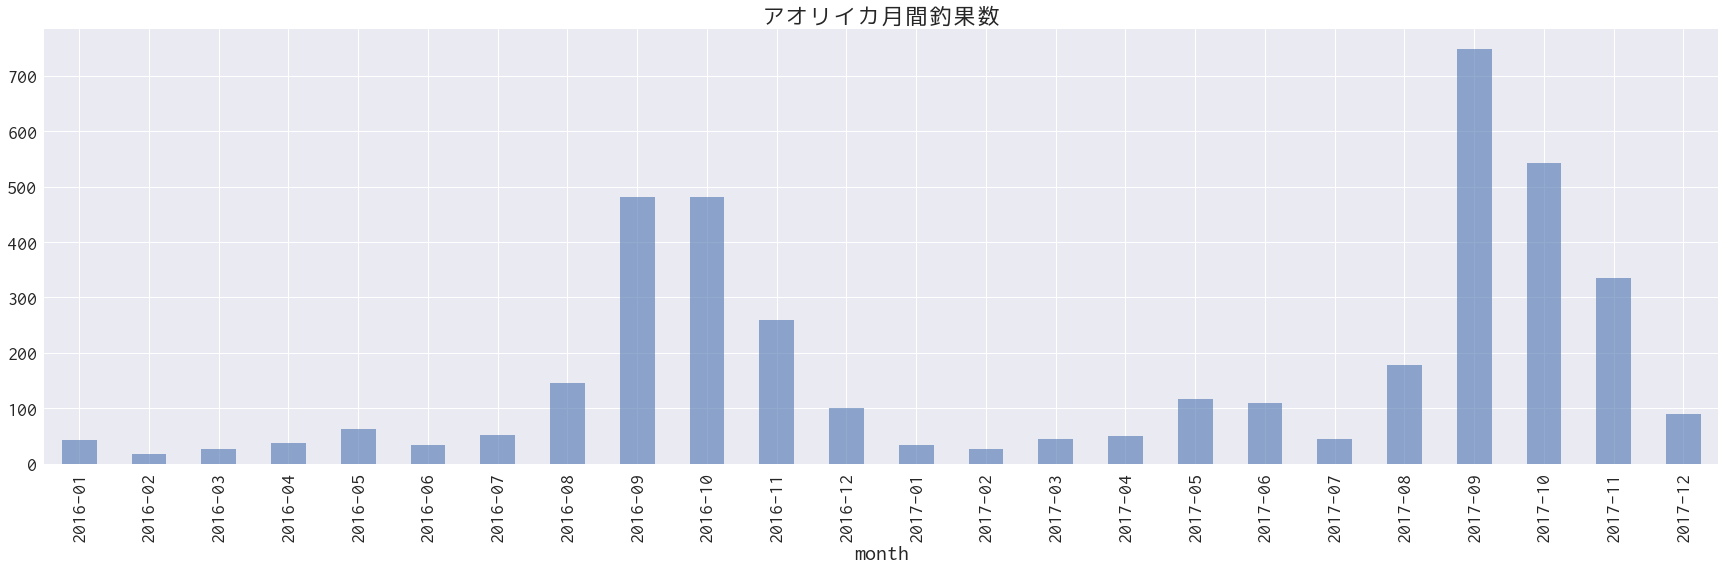

In [125]:
for name, group in fishsposts_groupby:
    if name == 'アオリイカ':
        months_groupby = group.groupby(['month'])
        months_count = months_groupby.size()
        plt.figure()
        months_count.plot.bar(title=name+'月間釣果数', figsize=(30, 8), alpha=0.6)

In [124]:
aoriposts = months_groupby.get_group(('2017-12'))
aoriposts_high = aoriposts.query('kpf_point >= 150')
aoriposts_high

,ID,month,term_taxonomy_id,kpf_point,term_id,name,taxonomy,term_id_2,name_2,term_id_3,name_3,term_id_4,name_4,lank
23805,1157385,2017-12,1073.0,160.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23810,1158143,2017-12,1073.0,160.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23821,1160889,2017-12,1073.0,150.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23824,1161560,2017-12,1073.0,160.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23826,1161679,2017-12,1073.0,160.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23831,1164224,2017-12,1073.0,150.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23835,1165514,2017-12,1073.0,160.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23837,1165585,2017-12,1073.0,180.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23862,1175275,2017-12,1073.0,150.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23865,1176575,2017-12,1073.0,150.0,33,アオリイカ,fish,NaN,NaN,NaN,NaN,NaN,NaN,0.0
